# Convert cities location data to json format

Data from https://developers.google.com/public-data/docs/canonical/countries_csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
cities = pd.read_csv('cities.csv',encoding='utf-8');

In [4]:
from unidecode import unidecode

In [5]:
citiesDict = {}
for i in range(cities.shape[0]):
    citiesDict[unidecode(cities.loc[i][3])]= {'lon': cities.loc[i][2], \
                                              'lat':cities.loc[i][1],\
                                             'name':unidecode(cities.loc[i][3])}

In [6]:
import json
f = open('citiesLocation.json','w')
a = json.dumps(citiesDict,indent=2)
f.write(a)
f.close()

In [7]:
!cp citiesLocation.json ../../web/app/data/cities.json

In [8]:
!cat ../../web/app/data/cities.json

{
  "Canada": {
    "lat": 56.130366000000002, 
    "lon": -106.34677099999999, 
    "name": "Canada"
  }, 
  "Sao Tome and Principe": {
    "lat": 0.18636, 
    "lon": 6.6130810000000002, 
    "name": "Sao Tome and Principe"
  }, 
  "Guinea-Bissau": {
    "lat": 11.803749, 
    "lon": -15.180413, 
    "name": "Guinea-Bissau"
  }, 
  "Saint Helena": {
    "lat": -24.143473999999998, 
    "lon": -10.030696000000001, 
    "name": "Saint Helena"
  }, 
  "Lithuania": {
    "lat": 55.169438, 
    "lon": 23.881274999999999, 
    "name": "Lithuania"
  }, 
  "Cambodia": {
    "lat": 12.565678999999999, 
    "lon": 104.99096299999999, 
    "name": "Cambodia"
  }, 
  "Ethiopia": {
    "lat": 9.1449999999999996, 
    "lon": 40.489672999999996, 
    "name": "Ethiopia"
  }, 
  "Aruba": {
    "lat": 12.52111, 
    "lon": -69.968338000000003, 
    "name": "Aruba"
  }, 
  "Swaziland": {
    "lat": -26.522503000000004, 
    "lon": 31.465865999999998, 
    "name": "Swaziland"
  }, 
  "Argentina": {
    

# Draw them in a sphere

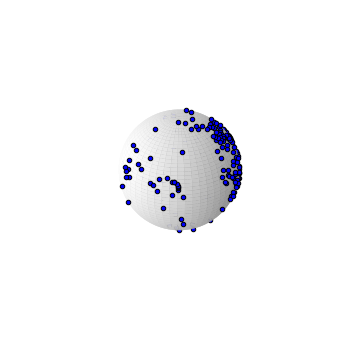

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9*1.5,4*1.5))
ax = fig.add_subplot(111, projection='3d')

#sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xs = 10 * np.outer(np.cos(u), np.sin(v))
ys = 10 * np.outer(np.sin(u), np.sin(v))
zs = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(xs, ys, zs, rstride=2, cstride=2, color='w', lw=0)


#points
deg2rad=np.pi/180.
for i in range(cities.shape[0]):
    lat,lon= [cities.loc[i][1],cities.loc[i][2]]
#     print lat
    xp = 10.*np.cos(lat*deg2rad)*np.cos(lon*deg2rad)
    yp = 10.*np.cos(lat*deg2rad)*np.sin(lon*deg2rad)
    zp = 10.*np.sin(lat*deg2rad)

    ax.scatter(xp,yp,zp)

ax.set_aspect(1)
ax.set_axis_off()